# BGC Argo data workshop (example)

## Workshop overview
<li> Loading libraries
<li> Fetching and loading Data
<li> Plotting gridded data
<li> Plotting interpolated data

In [ ]:
# Loading libraries
import argopy as ar
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogLocator

We will use the Argopy library to fetch and load data from a BGC Argo float. The documentation is available at [Argopy documentation](https://argopy.readthedocs.io/en/latest/).

In [40]:
ds = ar.DataFetcher().float(3901586).to_xarray()

Here we used the fecthing function without any arguments to search for the float data. The float file has been parsed into an xarray dataset.
We can visualize the dataset using the `display` function.

In [41]:
display(ds)

<xarray.Dataset> Size: 6MB
Dimensions:          (N_POINTS: 66613)
Coordinates:
    LATITUDE         (N_POINTS) float64 533kB 60.91 60.91 60.91 ... 60.72 60.72
    LONGITUDE        (N_POINTS) float64 533kB -17.12 -17.12 ... -27.13 -27.13
    TIME             (N_POINTS) datetime64[ns] 533kB 2024-10-11T13:50:25 ... ...
  * N_POINTS         (N_POINTS) int32 266kB 0 1 2 3 ... 66609 66610 66611 66612
Data variables: (12/15)
    CYCLE_NUMBER     (N_POINTS) int32 266kB 1 1 1 1 1 1 1 ... 94 94 94 94 94 94
    DATA_MODE        (N_POINTS) <U1 266kB 'R' 'R' 'R' 'R' ... 'R' 'R' 'R' 'R'
    DIRECTION        (N_POINTS) <U1 266kB 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER  (N_POINTS) int32 266kB 3901586 3901586 ... 3901586 3901586
    POSITION_QC      (N_POINTS) int32 266kB 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    PRES             (N_POINTS) float32 266kB 3.52 4.46 ... 1.351e+03 1.352e+03
    ...               ...
    PSAL_ERROR       (N_POINTS) float32 266kB nan nan nan nan ... nan nan nan
    PSAL_QC          (N_POINTS) int32 266kB 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    TEMP             (N_POINTS) float32 266kB 11.33 11.33 11.33 ... 3.883 3.882
    TEMP_ERROR       (N_POINTS) float32 266kB nan nan nan nan ... nan nan nan
    TEMP_QC          (N_POINTS) int32 266kB 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    TIME_QC          (N_POINTS) int32 266kB 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         erddap.ifremer.fr
    Fetched_by:           flapet
    Fetched_date:         2025/08/08
    Fetched_constraints:  WMO3901586
    Fetched_uri:          https://erddap.ifremer.fr/erddap/tabledap/ArgoFloat...
    Processing_history:   [PRES,TEMP,PSAL] real-time and adjusted/delayed var...

But this float file is supposed to have standard BGC argo variables, here we only have the physics variables.<br/>

We will specify the dataset and the source of the data to make sure we fetch the full BGC Argo dataset from ERDDAP.

In [4]:
with ar.set_options(mode='expert'):
    ds_bgc = ar.DataFetcher(backend='erddap', ds = 'bgc').float(3901586).to_xarray()

In [5]:
display(ds_bgc)

<xarray.Dataset> Size: 63MB
Dimensions:                            (N_POINTS: 173656)
Coordinates:
    LATITUDE                           (N_POINTS) float64 1MB ...
    LONGITUDE                          (N_POINTS) float64 1MB ...
    TIME                               (N_POINTS) datetime64[ns] 1MB ...
  * N_POINTS                           (N_POINTS) int32 695kB 0 1 ... 173655
Data variables: (12/84)
    BBP700                             (N_POINTS) float32 695kB ...
    BBP700_ADJUSTED                    (N_POINTS) float32 695kB ...
    BBP700_ADJUSTED_ERROR              (N_POINTS) float32 695kB ...
    BBP700_ADJUSTED_QC                 (N_POINTS) int32 695kB 1 0 1 1 ... 0 0 1
    BBP700_DATA_MODE                   (N_POINTS) <U1 695kB '' '' '' ... 'A' 'A'
    BBP700_QC                          (N_POINTS) int32 695kB 1 0 1 1 ... 0 0 1
    ...                                 ...
    TEMP_ADJUSTED                      (N_POINTS) float32 695kB ...
    TEMP_ADJUSTED_ERROR                (N_POINTS) float32 695kB ...
    TEMP_ADJUSTED_QC                   (N_POINTS) int32 695kB 0 0 0 0 ... 8 8 1
    TEMP_DATA_MODE                     (N_POINTS) <U1 695kB 'R' 'R' ... 'R' 'R'
    TEMP_QC                            (N_POINTS) int32 695kB 3 3 3 3 ... 8 8 1
    TIME_QC                            (N_POINTS) int32 695kB 1 1 1 1 ... 1 1 1
Attributes:
    DATA_ID:              ARGO-BGC
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         erddap.ifremer.fr
    Fetched_by:           flapet
    Fetched_date:         2025/08/08
    Fetched_constraints:  WMO3901586
    Fetched_uri:          https://erddap.ifremer.fr/erddap/tabledap/ArgoFloat...

Great, we have found the full BGC data for this float. 
Alternatively we can access the 'profile' dataset to get more information about the float trajectory and data mode. 

In [6]:
prof = ar.ArgoFloat(3901586).open_dataset('prof')

In [7]:
display(prof)

<xarray.Dataset> Size: 8MB
Dimensions:                       (N_PROF: 96, N_PARAM: 3, N_LEVELS: 1176,
                                   N_CALIB: 1, N_HISTORY: 0)
Dimensions without coordinates: N_PROF, N_PARAM, N_LEVELS, N_CALIB, N_HISTORY
Data variables: (12/64)
    DATA_TYPE                     <U16 64B ...
    FORMAT_VERSION                <U4 16B ...
    HANDBOOK_VERSION              <U4 16B ...
    REFERENCE_DATE_TIME           datetime64[ns] 8B ...
    DATE_CREATION                 datetime64[ns] 8B ...
    DATE_UPDATE                   datetime64[ns] 8B ...
    ...                            ...
    HISTORY_ACTION                (N_HISTORY, N_PROF) <U1 0B ...
    HISTORY_PARAMETER             (N_HISTORY, N_PROF) <U1 0B ...
    HISTORY_START_PRES            (N_HISTORY, N_PROF) float32 0B ...
    HISTORY_STOP_PRES             (N_HISTORY, N_PROF) float32 0B ...
    HISTORY_PREVIOUS_VALUE        (N_HISTORY, N_PROF) float32 0B ...
    HISTORY_QCTEST                (N_HISTORY, N_PROF) <U1 0B ...
Attributes:
    title:                Argo float vertical profile
    institution:          FR GDAC
    source:               Argo float
    history:              2025-08-08T02:48:26Z creation
    references:           http://www.argodatamgt.org/Documentation
    user_manual_version:  3.1
    Conventions:          Argo-3.1 CF-1.6
    featureType:          trajectoryProfile

## Let's make some plots

We can first easily visualise the trajectory of the float with a scatter plot.

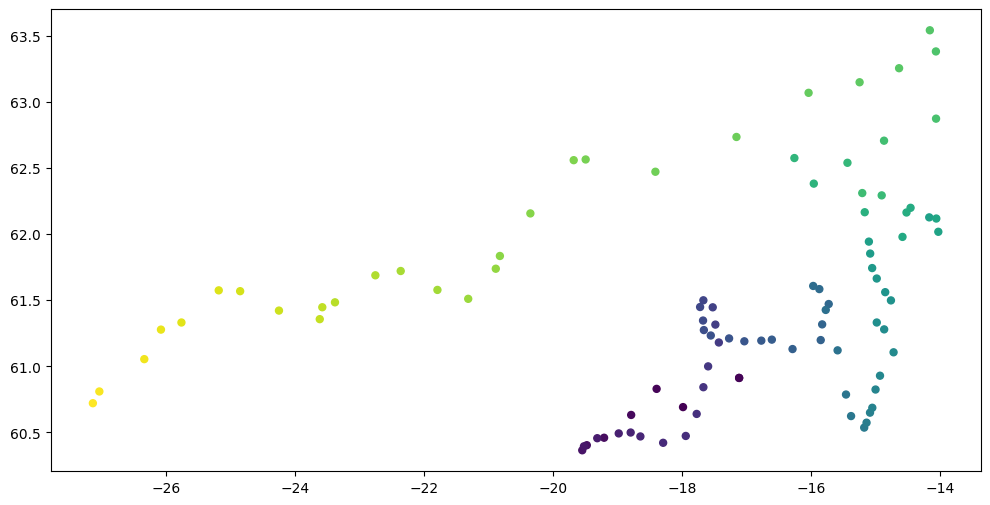

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.scatter(prof['LONGITUDE'].values, prof['LATITUDE'].values,c = prof['CYCLE_NUMBER'], s=25)
plt.show()

We can visualise the transect of the float with a bit more data manipulation. We will regrid the data in depth and time, and then plot the data as a 2D image.


In [27]:
def plot_transect(ds, varname, depth_min = 0, depth_max = 200, log_scale=False):
    # Build dataset from point-form arrays
    ds_points = xr.Dataset(
        {
            "VAR": ("obs", ds[varname].values),
            "PRES": ("obs", ds['PRES'].values),
            "TIME": ("obs", ds['TIME'].values)
        }
    )

    # Unique profile times
    times_unique = np.unique(ds_points['TIME'].values)

    # Regular pressure grid
    depth_grid = np.arange(depth_min, depth_max, 2)  # adjust range and step as needed

    profiles = []
    for t in times_unique:
        # Select all measurements at this time
        mask_time = ds_points['TIME'].values == t
        pres_vals = ds_points['PRES'].values[mask_time]
        var_vals = ds_points['VAR'].values[mask_time]
        
        # Drop NaNs before interpolation
        mask_valid = np.isfinite(pres_vals) & np.isfinite(var_vals)
        if mask_valid.sum() > 1:
            var_interp = np.interp(depth_grid, pres_vals[mask_valid], var_vals[mask_valid],
                                    left=np.nan, right=np.nan)
        else:
            var_interp = np.full_like(depth_grid, np.nan, dtype=float)
        profiles.append(var_interp)

    # Convert to xarray DataArray for plotting
    var_section = xr.DataArray(
        np.array(profiles),
        coords={"TIME": times_unique, "PRES": depth_grid},
        dims=("TIME", "PRES")
    )
    units = ds[varname].attrs['units']

    # Plot section
    plt.figure(figsize=(12, 6))
    if log_scale:
        pcm = plt.pcolormesh(
        var_section['TIME'],
        var_section['PRES'],
        var_section.T,
        shading='auto',
        cmap='viridis',
        norm=LogNorm(vmin=1e-3, vmax=np.nanmax(var_section))  # adjust vmin as needed
    )
    else:
        pcm = plt.pcolormesh(var_section['TIME'], var_section['PRES'], var_section.T,
                            shading='auto', cmap='viridis')
    plt.gca().invert_yaxis()
    plt.colorbar(pcm, label=f'{varname} {units}')
    plt.xlabel('Time')
    plt.ylabel('Pressure (dbar)')
    plt.title(f'BGC-Argo {varname} Section (Depth vs Time)')
    plt.tight_layout()
    plt.show()

Using this function you can change arguments to make a plot of any variable in the dataset, change the depth range or the log scale of the colorbar.

```python

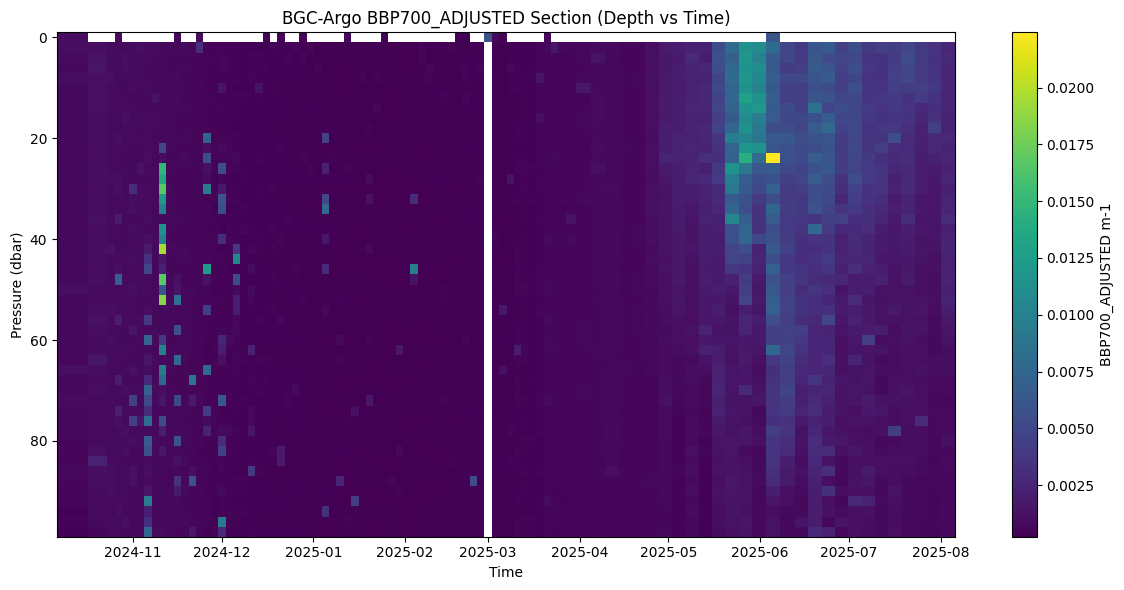

In [33]:
plot_transect(ds_bgc, 'BBP700_ADJUSTED', depth_max = 100, log_scale=False)


We can make things look a bit nicer by interpolating the data over depth and time. 

In [34]:

def plot_interpolated_section(ds_bgc, varname='CHLA_ADJUSTED', depth_min=0, depth_max=200, log_scale=True):
    # Build dataset from point-form arrays
    ds_points = xr.Dataset(
        {
            "VAR": ("obs", ds_bgc[varname].values),
            "PRES": ("obs", ds_bgc['PRES'].values),
            "TIME": ("obs", ds_bgc['TIME'].values)
        }
    )

    # Unique profile times
    times_unique = np.unique(ds_points['TIME'].values)

    # Regular pressure grid
    depth_grid = np.arange(depth_min, depth_max + 1, 1)  # include depth_max

    profiles = []
    for t in times_unique:
        mask_time = ds_points['TIME'].values == t
        pres_vals = ds_points['PRES'].values[mask_time]
        var_vals = ds_points['VAR'].values[mask_time]

        # Valid mask
        mask_valid = np.isfinite(pres_vals) & np.isfinite(var_vals)
        if mask_valid.sum() > 1:
            var_interp = np.interp(depth_grid, pres_vals[mask_valid], var_vals[mask_valid],
                                   left=np.nan, right=np.nan)
        else:
            var_interp = np.full_like(depth_grid, np.nan, dtype=float)
        profiles.append(var_interp)

    # Create DataArray for gridded section
    var_section = xr.DataArray(
        np.array(profiles),
        coords={"TIME": times_unique, "PRES": depth_grid},
        dims=("TIME", "PRES")
    )

    # Interpolate in time for smoothness
    time_fine = np.linspace(
        np.min(times_unique.astype("datetime64[s]").astype(float)),
        np.max(times_unique.astype("datetime64[s]").astype(float)),
        500
    ).astype("datetime64[s]")

    var_section_smooth = var_section.interp(TIME=time_fine)

    # Plotting
    plt.figure(figsize=(14, 6))

    if log_scale:
        vmin = np.nanmax([1e-6, np.nanmin(var_section_smooth.values[var_section_smooth.values > 0])])
        vmax = np.nanmax(var_section_smooth.values)
        norm = LogNorm(vmin=vmin, vmax=vmax)
        pcm = plt.pcolormesh(
            var_section_smooth['TIME'],
            var_section_smooth['PRES'],
            var_section_smooth.T,
            shading='auto',
            cmap='viridis',
            norm=norm
        )
        cbar = plt.colorbar(pcm, label=f'{varname} (log scale)')
        cbar.ax.yaxis.set_major_locator(LogLocator(base=10, subs=(1, 2, 5)))
    else:
        pcm = plt.pcolormesh(
            var_section_smooth['TIME'],
            var_section_smooth['PRES'],
            var_section_smooth.T,
            shading='auto',
            cmap='viridis'
        )
        plt.colorbar(pcm, label=varname)

    plt.gca().invert_yaxis()
    plt.xlabel('Time')
    plt.ylabel('Pressure (dbar)')
    plt.title(f'Interpolated BGC-Argo {varname} Section (Depth vs Time)')
    plt.tight_layout()
    plt.show()


Again you can tune the args of the function to plot what you want !

C:\Users\flapet\AppData\Local\Temp\ipykernel_13108\2854693161.py:46: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  var_section_smooth = var_section.interp(TIME=time_fine)


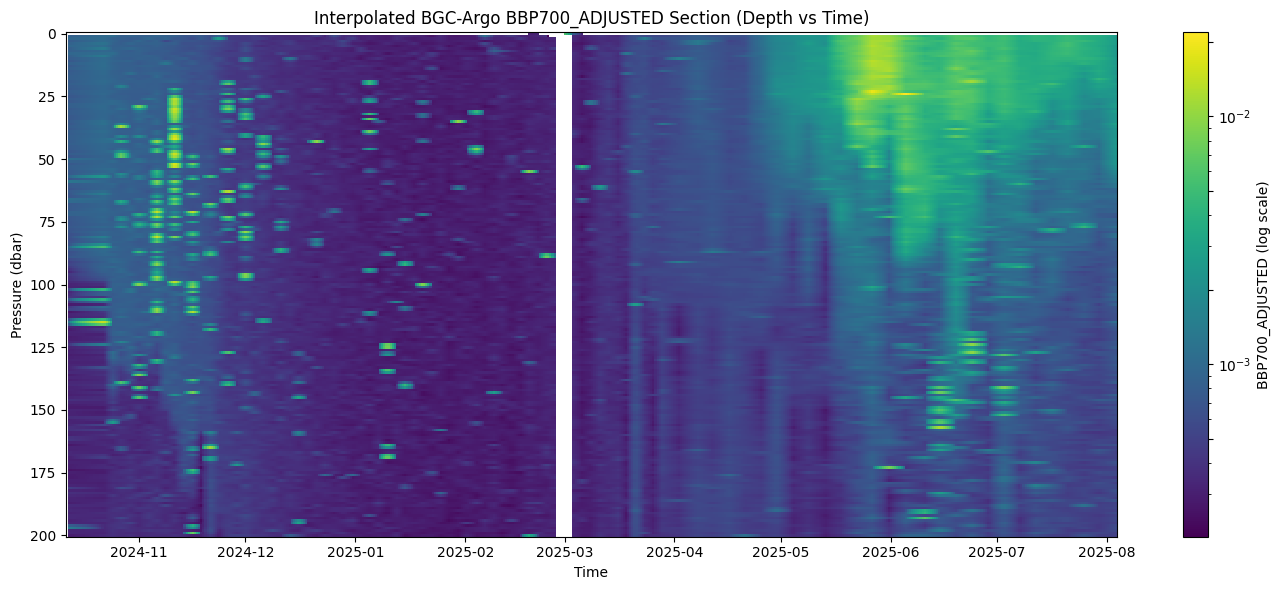

In [37]:
plot_interpolated_section(ds_bgc, 'BBP700_ADJUSTED', depth_max=200, log_scale=True)